# Internalizing problems and cardio-metabolic health in childhood ( 9-10 y)


Hello there, here is a little playgroung for exploring the relationship between internalizing symptoms and a range or cardio-metabolic health markers measured in 9-10 year-old children from the Generation R study (https://generationr.nl/). 

NOTE: this is still a work in progress! If you have any suggestions of notice typos/mistakes, please email me. 

##### First, let's get the dependencies we need

In [1]:
# getting to the data
import os.path

# data storage and handling
import pandas as pd; import numpy as np;

# plotting
import matplotlib.pyplot as plt; import seaborn as sns; 
sns.set()
%matplotlib inline

# make merging easier
from functools import reduce

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Point to the raw data
pathtodata = input("Enter the path to data: ")

if os.path.exists(pathtodata) == False:
    pathtodata = input("Not quite, try again: ")

Enter the path to data: /Users/Serena/Desktop/Data/


In [3]:
# This function reads SPSS format data files into pandas dataframes and sets the IDC column as index 
# Once I am at it, I get rid of empty rows as well

def read_and_clean(file, path = pathtodata):
    # read in the .sav file
    df = pd.read_spss(pathtodata + file)
    # set IDC to be the index rather than a column
    df.IDC = pd.to_numeric(df.IDC, downcast = 'integer')
    df.index = df.IDC
    df = df.drop(['IDC'], axis = 1)
    # drop children with no available data 
    df = df.dropna(how = 'all')
    return df

#### GET CARDIO-METABOLIC & INTERNALIZING DATA

In [4]:
# Read in the datasets
dxadata = read_and_clean("CHILDFATMASS9_13092016.sav") # 5862 obs of 27 vars
bp = read_and_clean("CHILDBLOODPRESSURE9_21042016.sav") # 5862 obs of 27 vars
serum = read_and_clean("CHILDSERUM9_01082017.sav") # 5862 obs of 12 vars
growth = read_and_clean('CHILDGROWTH9_04062020.sav') # 5862 obs of 12 vars
obesity_dich = read_and_clean('CHILDOBESITY9_04062020.sav') # 5686 obs of 1 vars

# Extract only relevant variables and rename them to get rid of those horrorific variable names
fatmass = dxadata[['fat_mass_armsCHILD9', 'fat_mass_legsCHILD9','fat_mass_trunkCHILD9','fat_mass_androidCHILD9',
                   'avg_percent_fat','fat_mass_totalCHILD9','fat_mass_totalnoheadCHILD9']].dropna(how = 'all') # 5637 obs of 7 vars
fatmass.columns = ['fat_arms','fat_legs','fat_trunk','fat_android','fat_percent_avg','fat_total', 'fat_total_nohead']

bp = bp[['MEANSBP_ex1_child9', 'MEANDBP_ex1_child9']].dropna(how = 'all') # 5490 obs of 2 vars
bp.columns = ['SBP', 'DBP']

serum = serum.drop(['agechild9','KreatinineChild9_clean'], axis = 1).dropna(how = 'all') # 3958 obs of 10 vars
serum.columns = ['insuline','log_insuline','glucose','glucose_focus','cholesterol','crp','crp_categ','hdl_cholesterol','triglyc','log_triglyc']

bmi = growth[['sdsbmiforage9childT']].dropna(how = 'all') # 5861 obs of 1 vars
bmi.columns = ['BMI_4age']

In [5]:
# Read in the datasets
cbcl = read_and_clean("CHILDCBCL9_10082016.sav") # 5523 obs. of 626 vars

# Extract only relevant variables 
intern = cbcl[[ # 'AgeChild_CBCL9m',
              'cbcl5_9m',   # there is very little he/she enjoys
              'cbcl14_9m',  # cries a lot
              'cbcl29_9m',  # fears certain animals, situations or places other than school
              'cbcl30_9m',  # fears going to school
              'cbcl31_9m',  # fears he/she might think or do something bad
              'cbcl32_9m',  # feels he/she has to be perfect
              'cbcl33_9m',  # feels or complains that no one loves him/her
              'cbcl35_9m',  # feels worthless or inferior
              'cbcl42_9m',  # would rather be lone than with others
              'cbcl45_9m',  # nervous, highstrung or tense
              'cbcl47_9m',  # nightmares
              'cbcl49_9m',  # Constipated, doesn't move bowels
              'cbcl50_9m',  # too fearful or anxious
              'cbcl51_9m',  # feels dizzy or lightheaded
              'cbcl52_9m',  # feels too guilty
              'cbcl54_9m',  # overtired without good reason
              'cbcl56a_9m', # physical problems without medical cause ...aches or pains(not stomach or headaches)
              'cbcl56b_9m', # ...headaches
              'cbcl56c_9m', # ...nausea, feels sick
              'cbcl56d_9m', # ...problems with eyes (not if corrected with glasses)
              'cbcl56e_9m', # ...rashes or other skin problems
              'cbcl56f_9m', # ...stomachaches
              'cbcl56g_9m', # ...vomiting, throwing up
              'cbcl65_9m',  # refuses to talk
              'cbcl69_9m',  # secretive, keeps things to self
              'cbcl71_9m',  # self-conscious or easily embarrassed
              'cbcl75_9m',  # too shy or timid
              'cbcl91_9m',  # talks about killing self
              'cbcl102_9m', # underactive, slow moving, or lacks energy
              'cbcl103_9m', # unhappy, sad, or depressed
              'cbcl111_9m', # withdrawn, doesn't get involved with others
              'cbcl112_9m', # worries
              'Nmisint_9m', # number of missing values in internalizing scale items
              'sum_int_9m'  # weighted sum score internalizing scale (allowing 25% missing)
               # Calculation (based on SPSS script available on the V: drive): if 24 out of 32 items are available
               # (i.e. 75%), sum of the item scores * (32 / 32 - nmisnt_9m). 
]].dropna(how = 'all') # 4962 obs of 34 vars

In [6]:
# child_general = read_and_clean("CHILD-ALLGENERALDATA_07072020.sav") # 9901 obs of 121 

In [7]:
# Merge the datasets toghether 
dfs = [intern, fatmass, bp, serum, bmi, obesity_dich]
multim = reduce(lambda left,right: pd.merge(left, right, on = 'IDC'), dfs)

<h2><center>Ok, let the plotting begin!</center></h2>

#### ORIGINAL VARIABLES

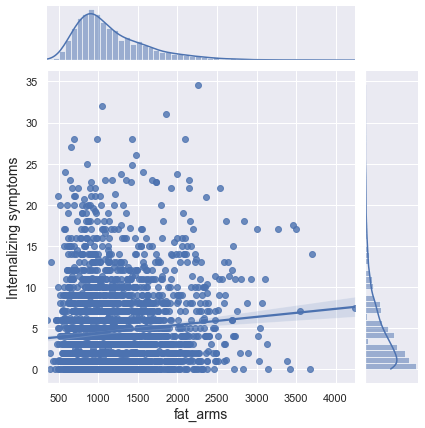

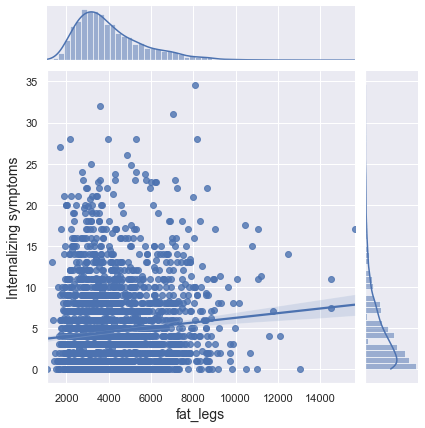

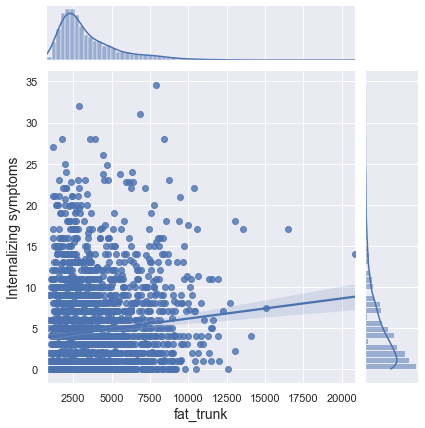

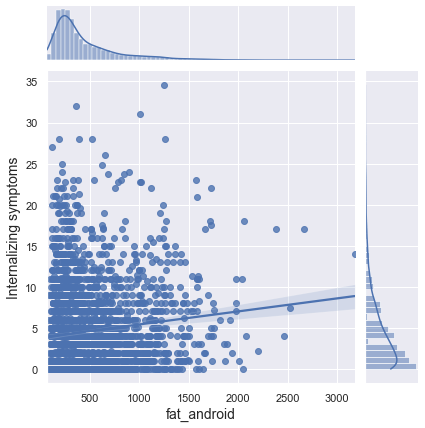

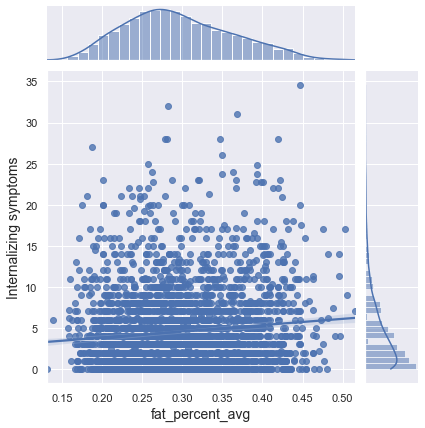

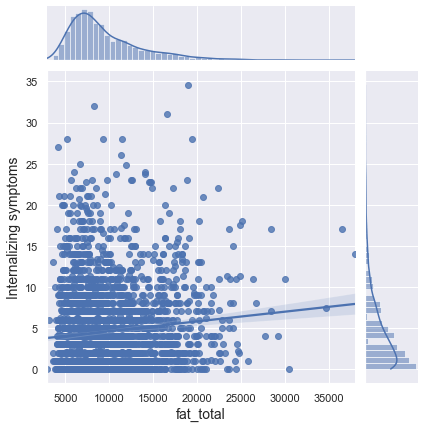

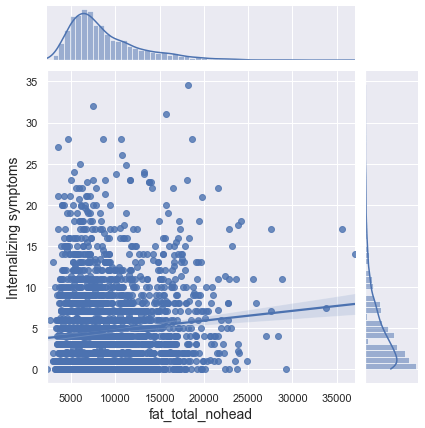

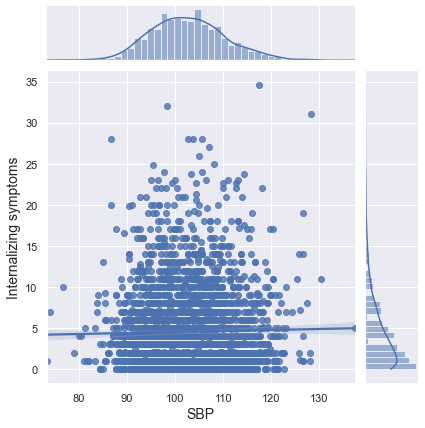

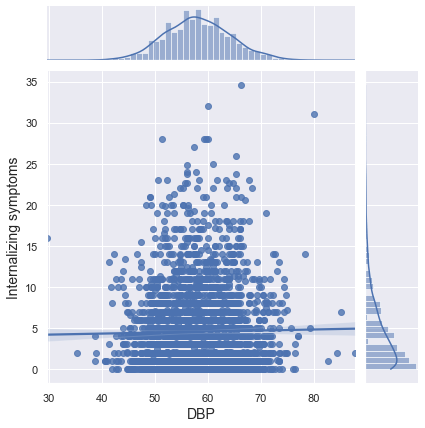

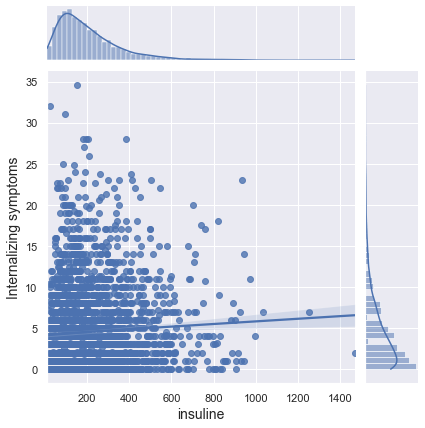

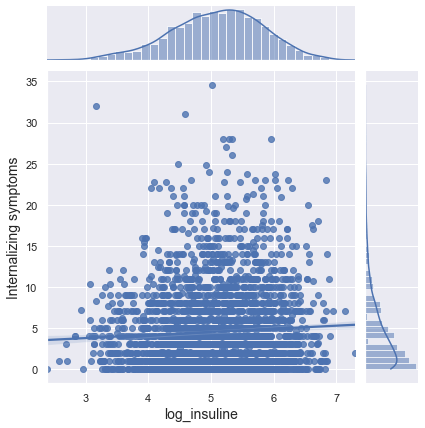

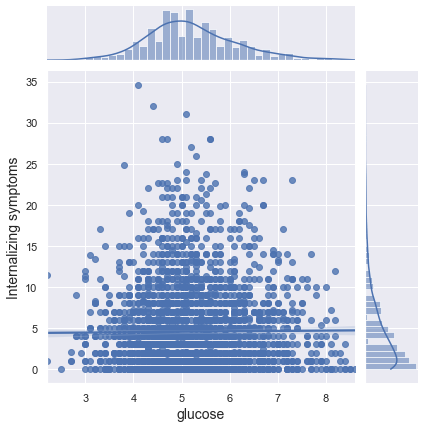

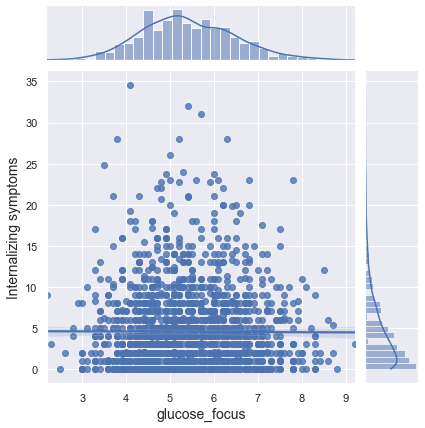

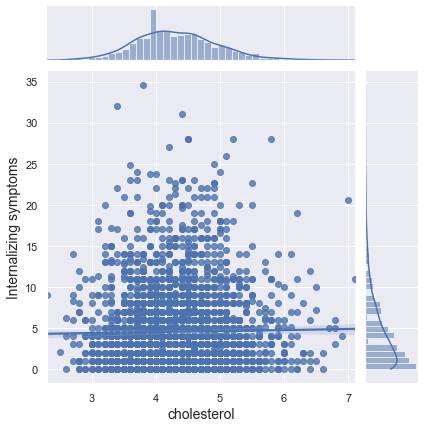

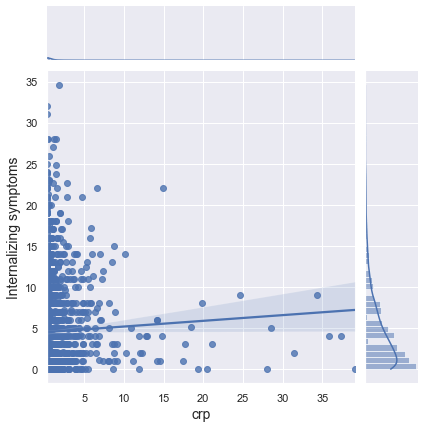

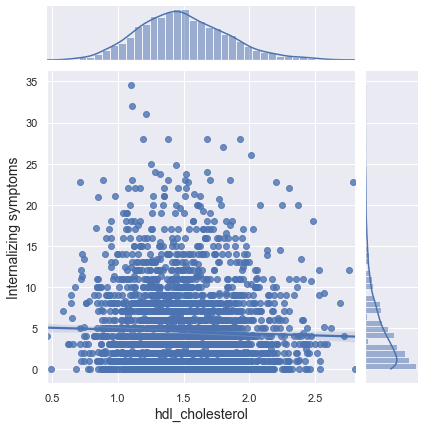

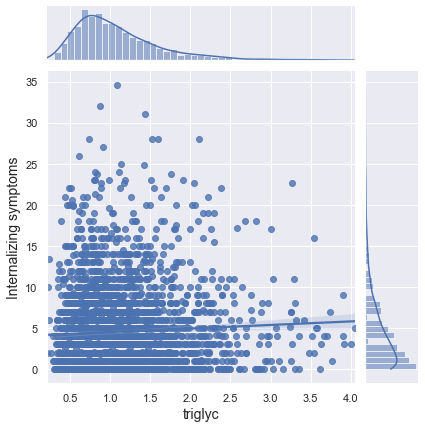

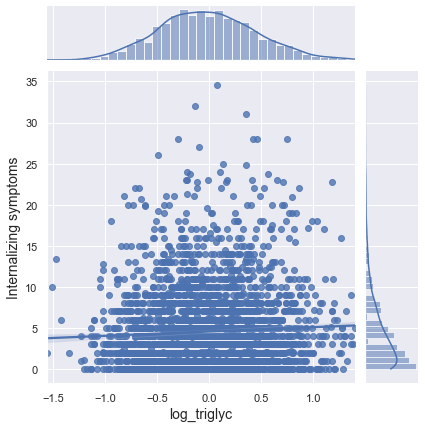

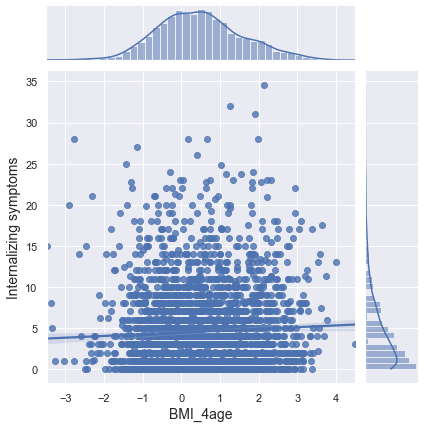

In [8]:
# Plot internalizing score against all cardio-metabolic variables available 
for i in range(1,21):
    if not i == 16: # CRP categorized has issues with jointplot, I will fix later
        p = sns.jointplot(data = multim, x = multim.columns[33+i], y = "sum_int_9m", kind="reg")
        p.set_axis_labels(multim.columns[33+i],'Internalizing symptoms', fontsize = 14)

The original variables did not seem to work well. 

Especially Internalizing is visibly very skewed. So, I tryed to normalize it by taking the log (that also didn't work very well).  

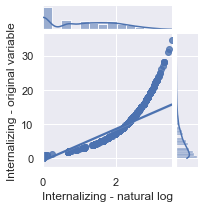

In [9]:
# let's try to normalize internalizing as it is very skewed
multim['log_intern'] = np.log(multim.sum_int_9m)
# quick and dirty fix -infinity values before plotting
multim.log_intern[multim.log_intern == -np.inf] = -0.0001

# plot
logplot = sns.jointplot(data = multim, x = "log_intern", y = "sum_int_9m" , kind="reg", height = 3)
logplot.set_axis_labels('Internalizing - natural log', 'Internalizing - original variable', fontsize = 12)

Let's have a look at the individual components (i.e items) of the internalizing score, hoping for more insightful plots

In [10]:
# List the items' content for more meaningful labels
cbcl_items = ['05 - very little he/she enjoys', '14 - cries a lot', '29 - fears animals, situations, places excluding school',
         '30 - fears going to school', '31 - fear to think or do something bad', '32 - feels he/she has to be perfect',
         '33 - feels or complains that no one loves him/her', '35 - feels worthless or inferior', '42 - would rather be alone',
         '45 - nervous, highstrung or tense', '47 - nightmares', '49 - constipated', '50 - too fearful or anxious',
         '51 - dizzy or lightheaded', '52 - feels too guilty', '54 - overtired without reason', '56a - aches or pains excluding stomach or headaches',
         '56b - headaches', '56c - nausea, feels sick', '56d - problems with eyes not corrected with glasses', '56e - rashes or other skin problems',
         '56f - stomachaches', '56g - vomiting, throwing up','65 - refuses to talk', '69 - secretive, keeps things to self',
         '71 - self-conscious or easily embarrassed', '75 - too shy or timid', '91 - talks about killing self',
         '102 - underactive, slow moving, lacks energy', '103 - unhappy, sad, or depressed', '111 - withdrawn, not involved with others',
         '112 - worries']

#### INTERNALIZING ITEMS vs TOTAL FAT MASS

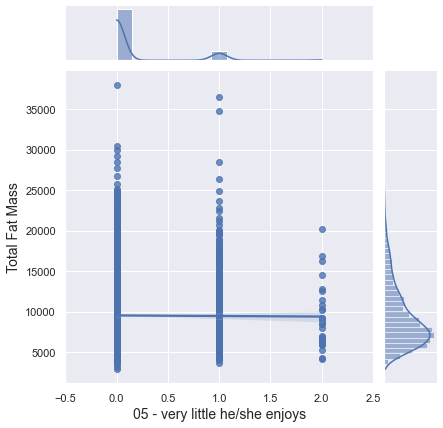

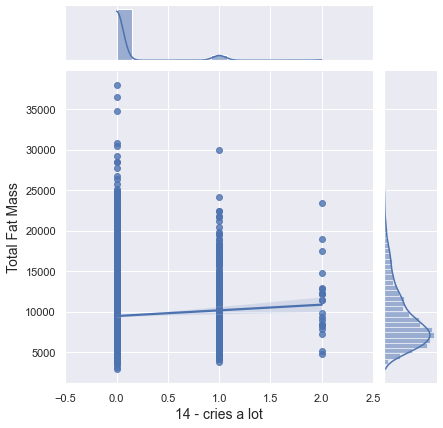

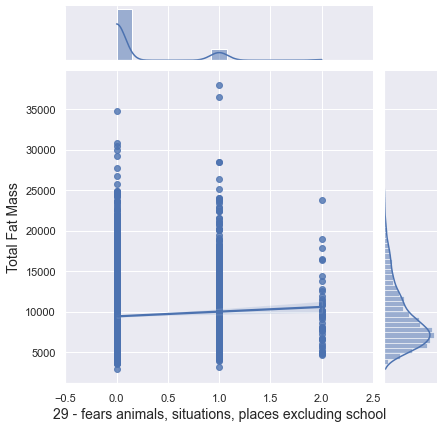

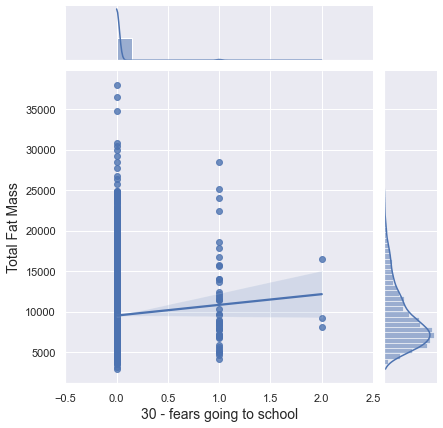

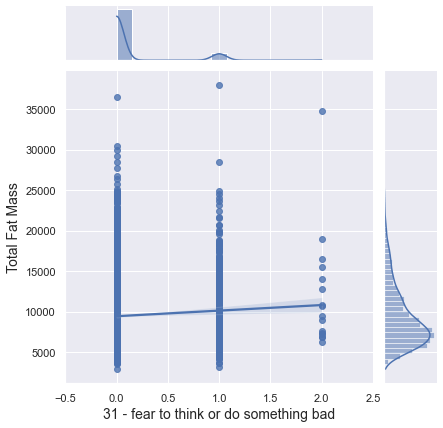

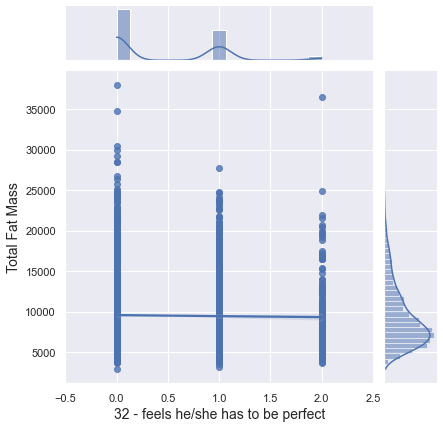

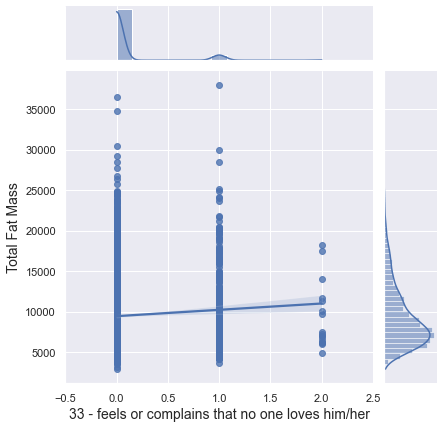

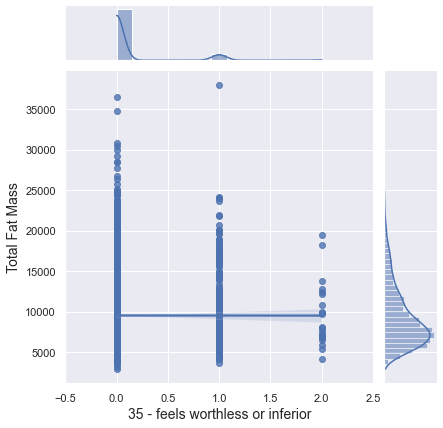

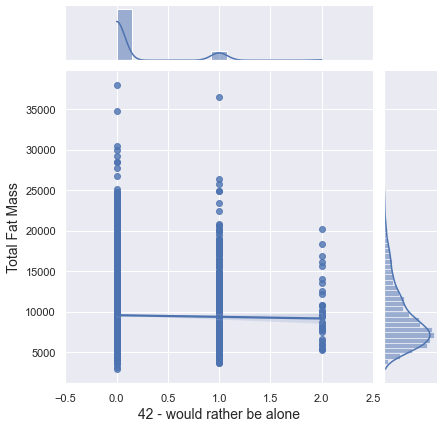

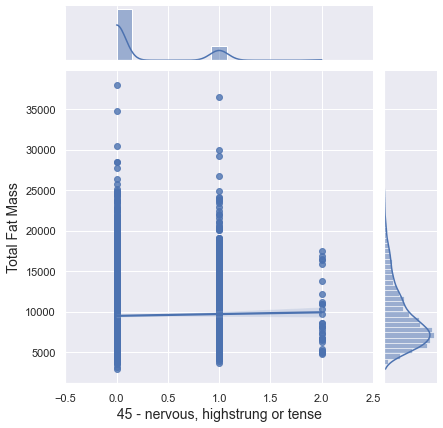

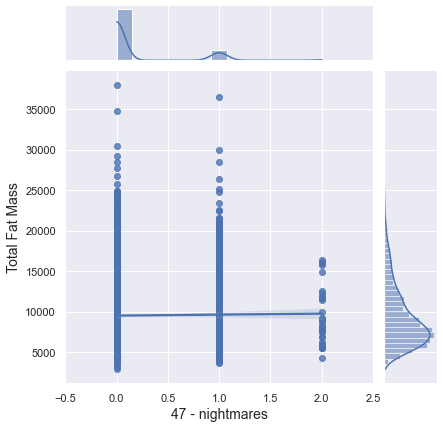

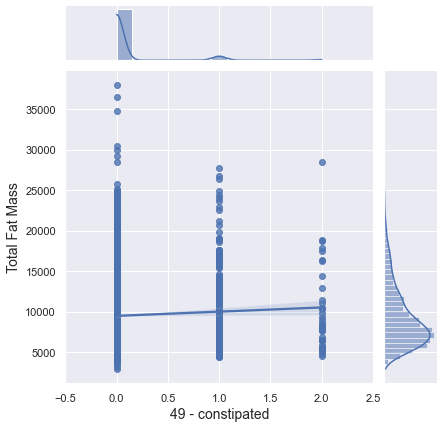

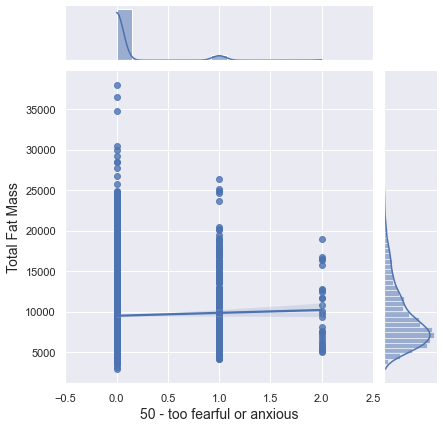

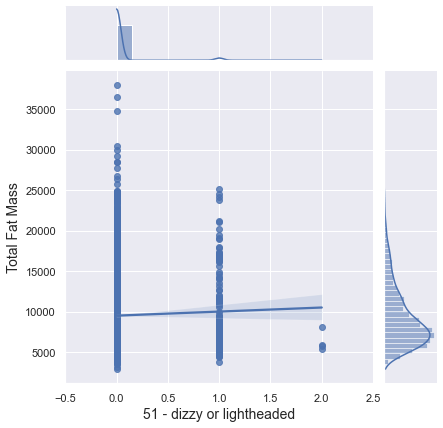

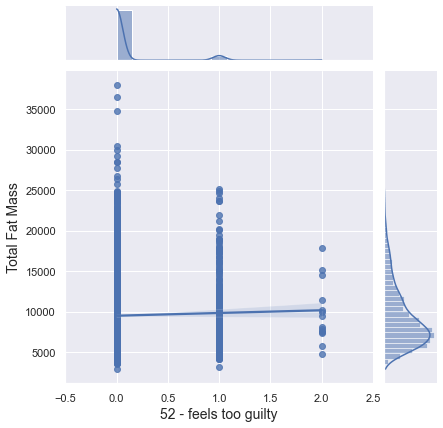

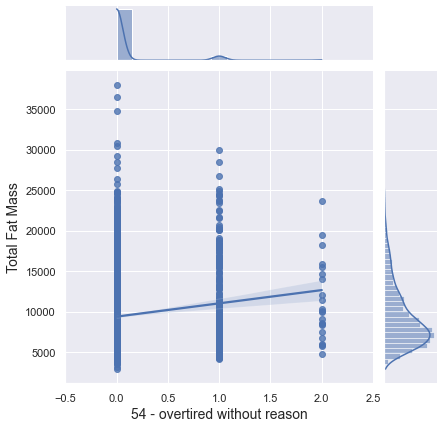

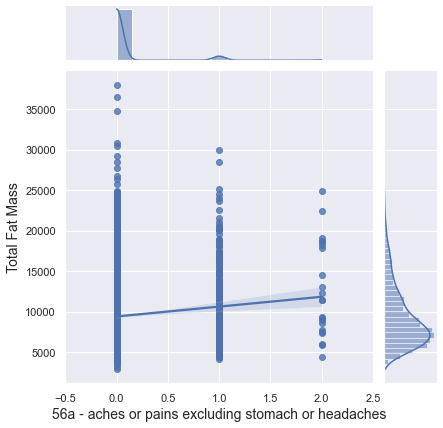

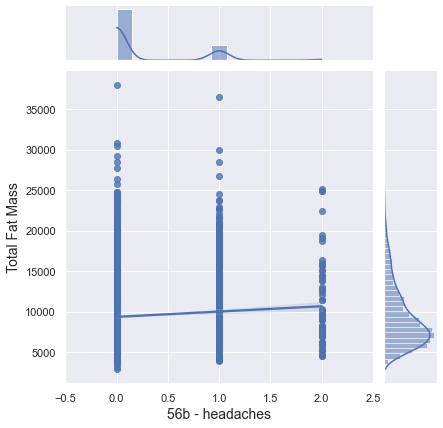

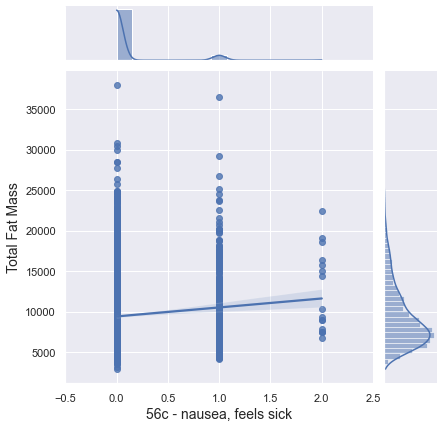

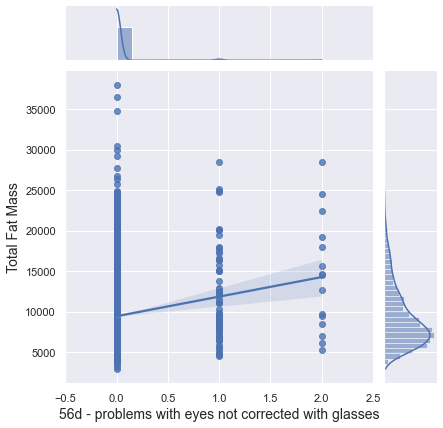

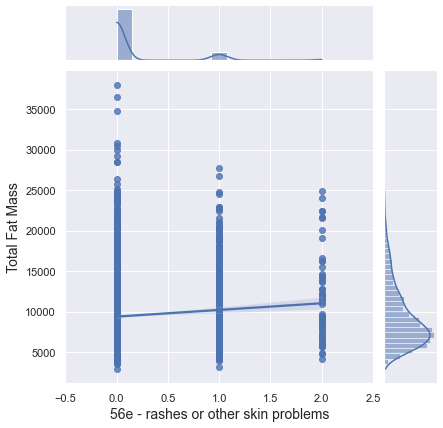

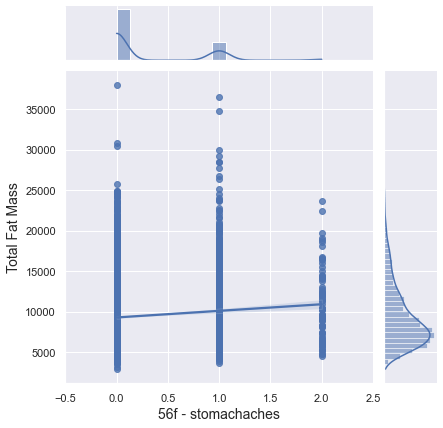

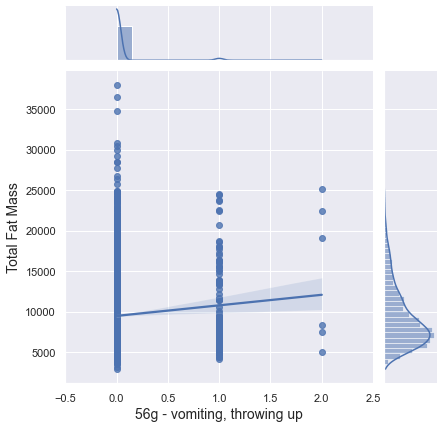

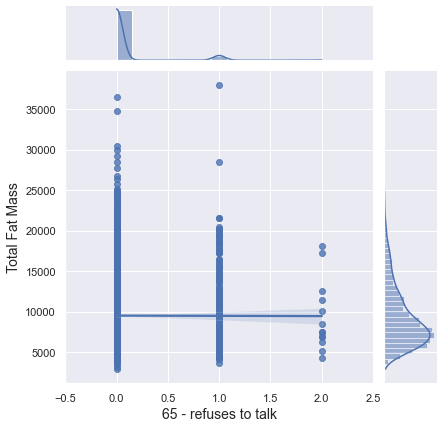

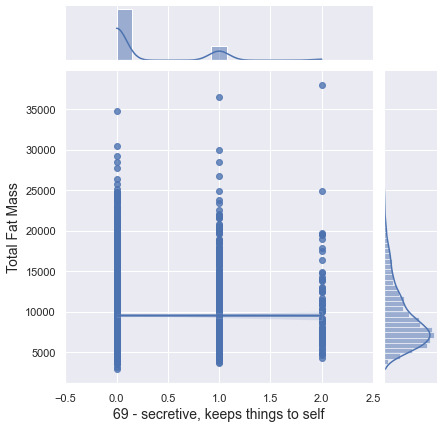

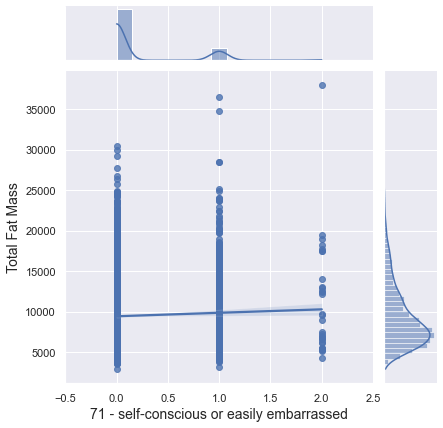

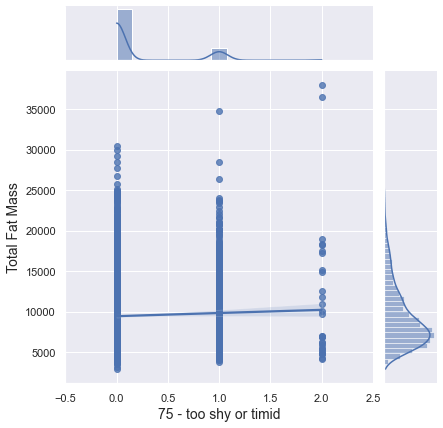

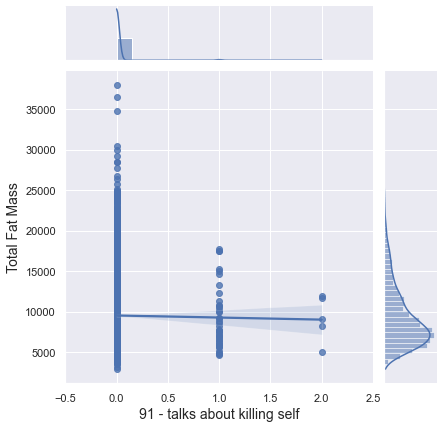

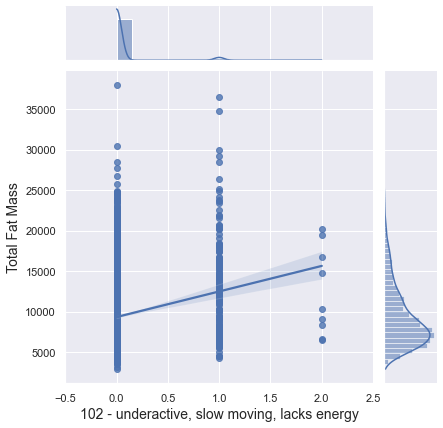

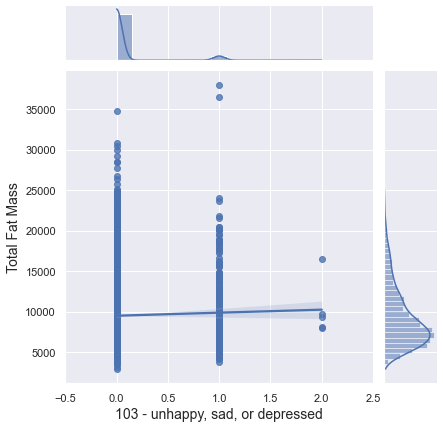

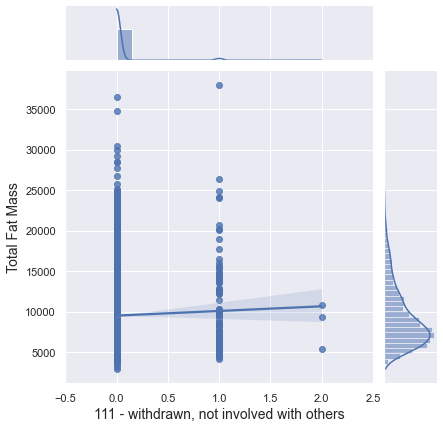

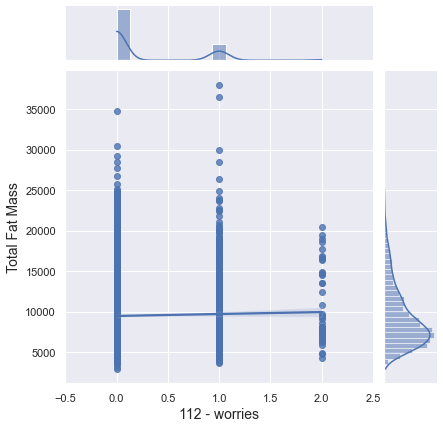

In [11]:
for i in range(32):
    p = sns.jointplot(data = multim, x = multim.columns[i], y = "fat_total", kind="reg", xlim = (-0.5,2.5))
    p.set_axis_labels(cbcl_items[i],'Total Fat Mass', fontsize = 14)

#### INTERNALIZING ITEMS vs BMI

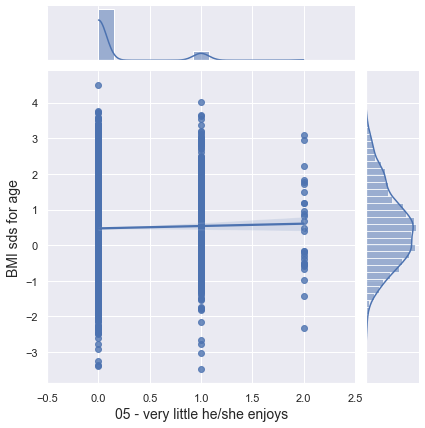

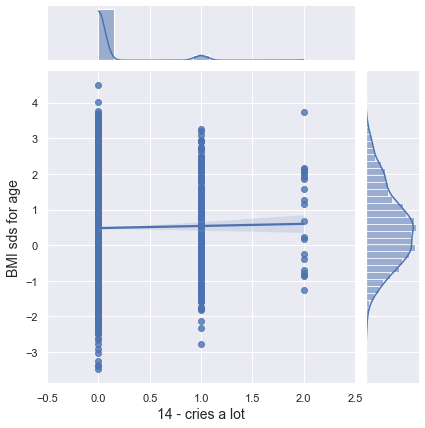

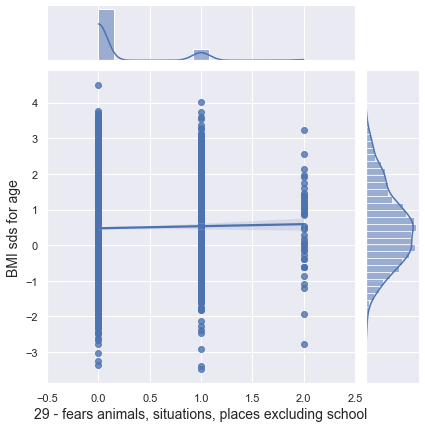

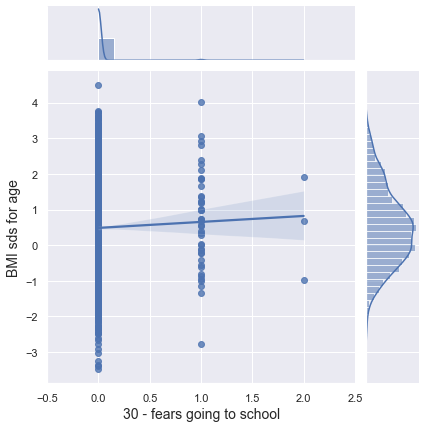

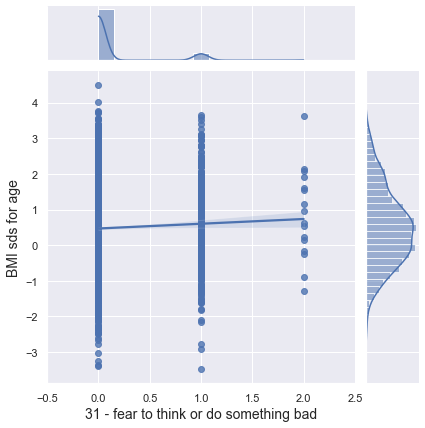

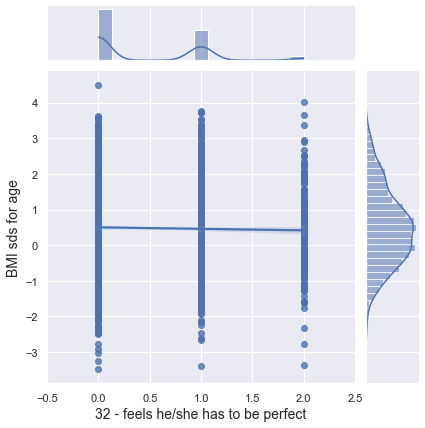

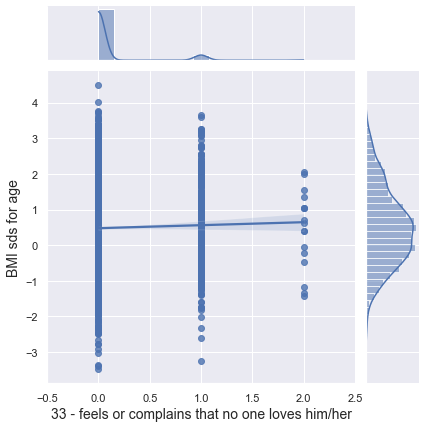

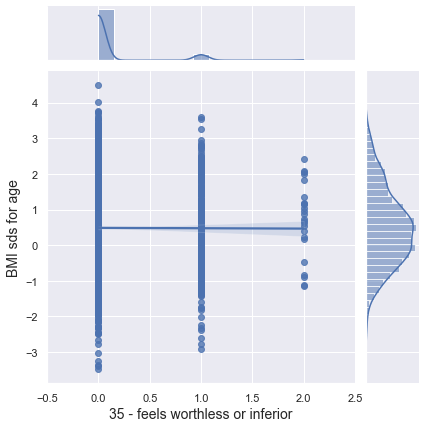

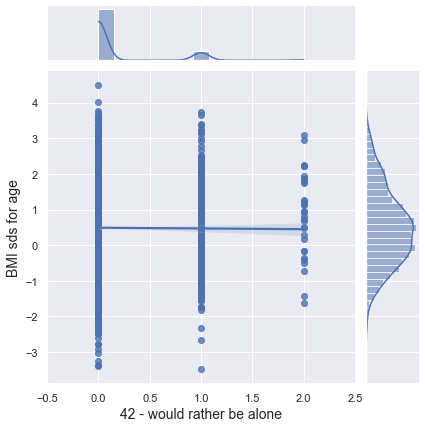

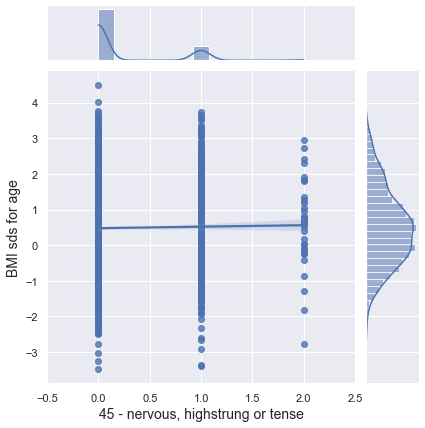

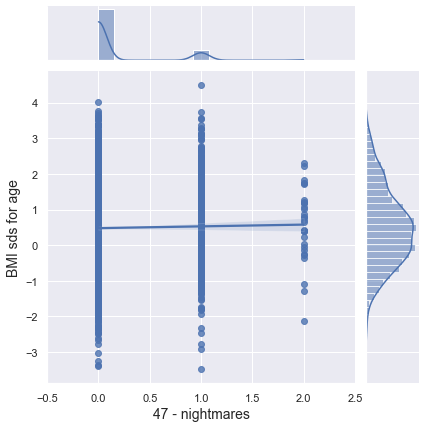

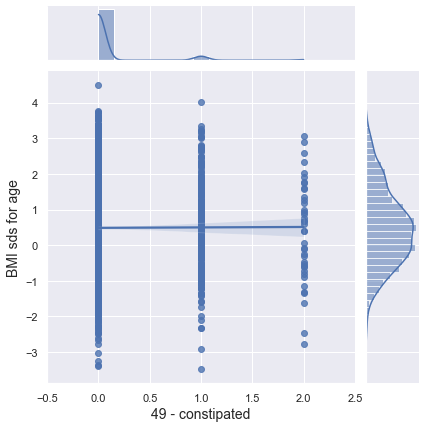

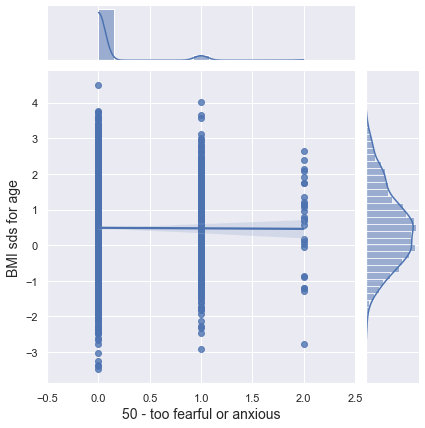

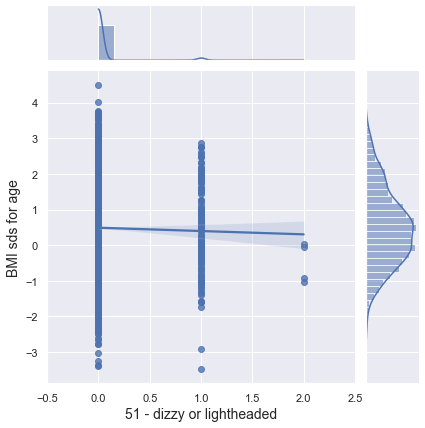

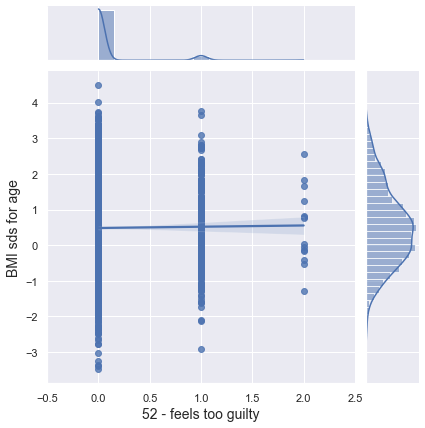

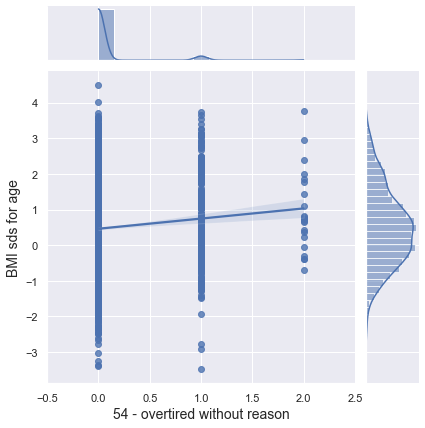

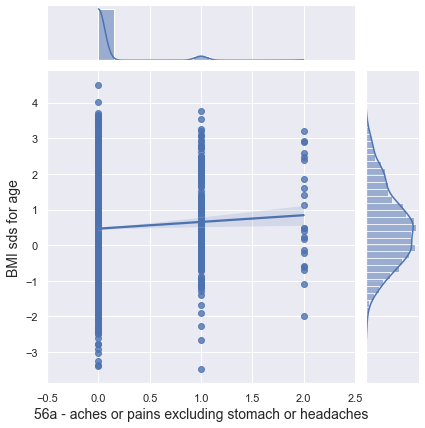

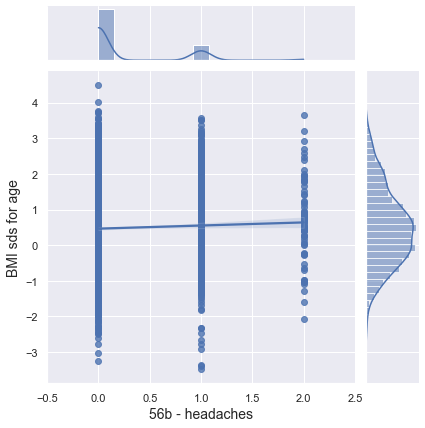

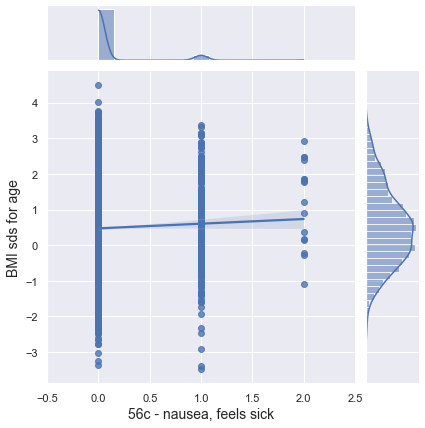

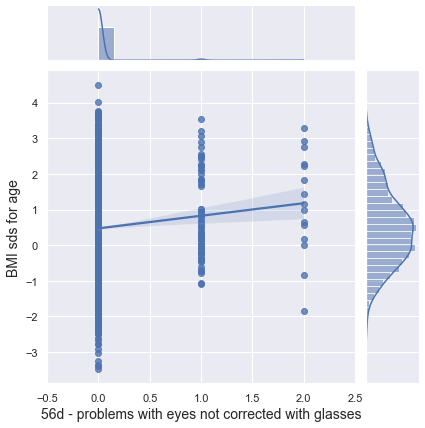

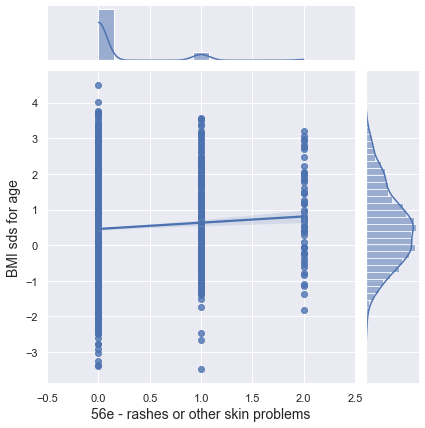

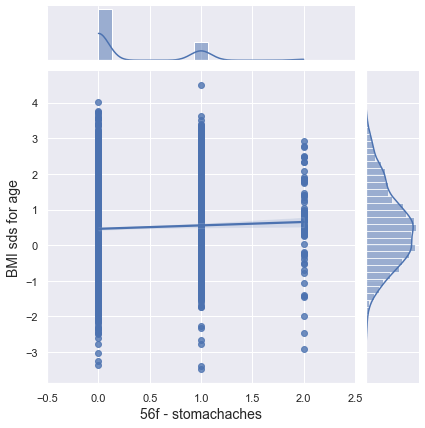

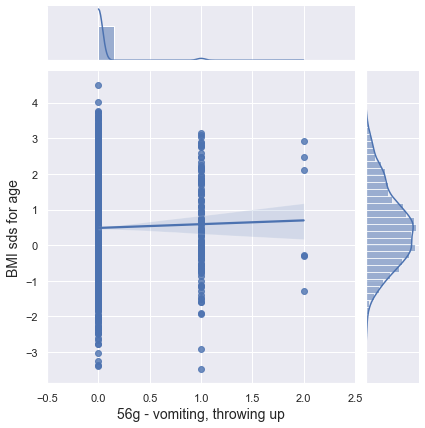

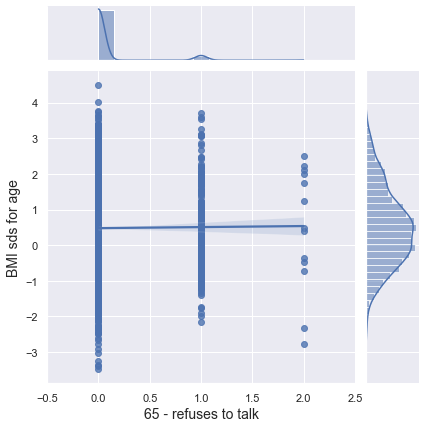

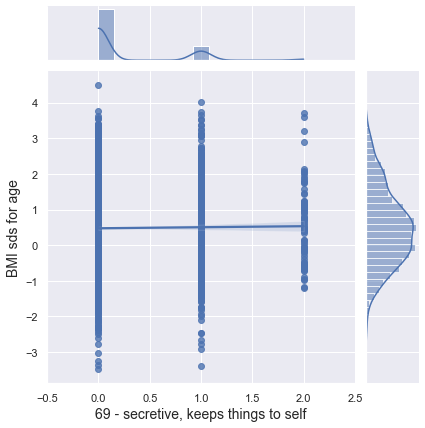

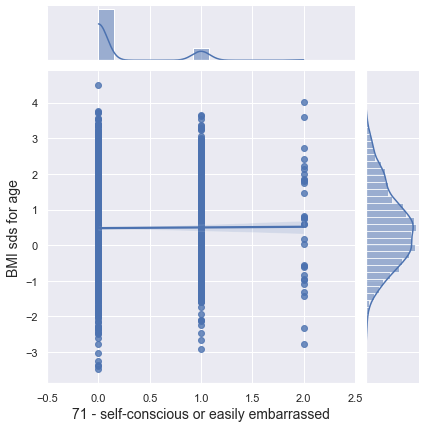

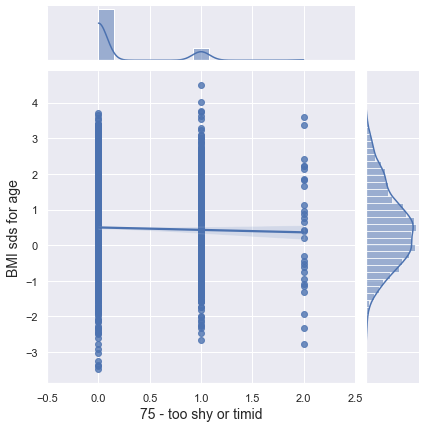

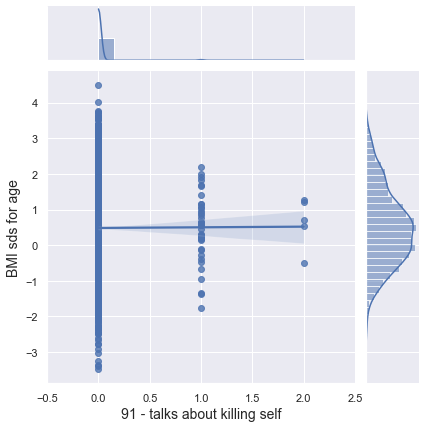

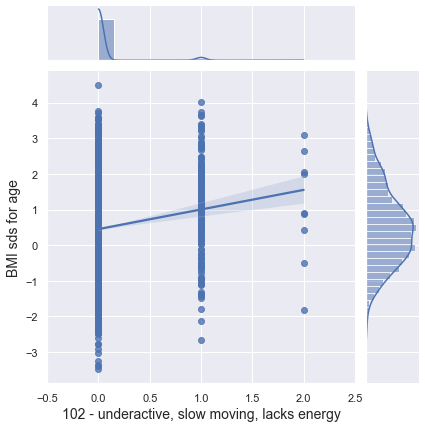

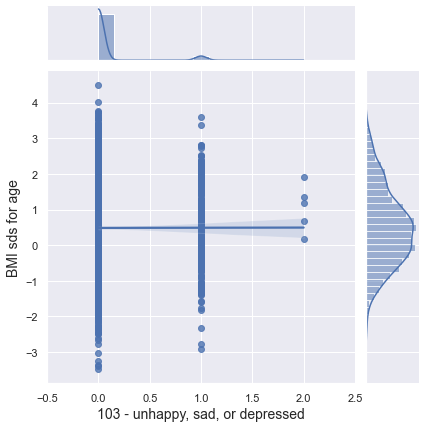

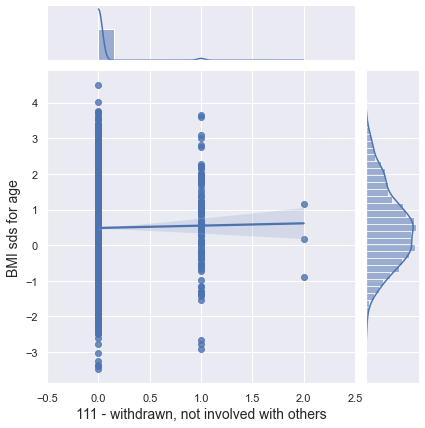

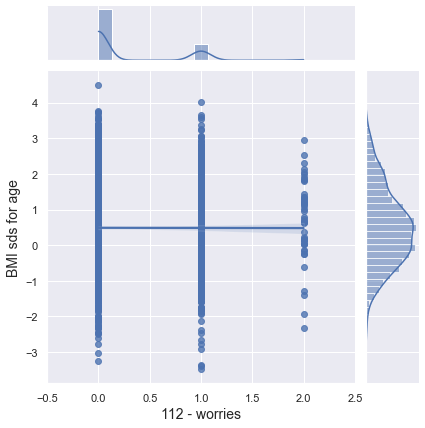

In [12]:
for i in range(32):
    p = sns.jointplot(data = multim, x = multim.columns[i], y = "BMI_4age", kind="reg", xlim = (-0.5,2.5))
    p.set_axis_labels(cbcl_items[i],'BMI sds for age', fontsize = 14)

#### INTERNALIZING ITEMS vs C-REACTIVE PROTEIN

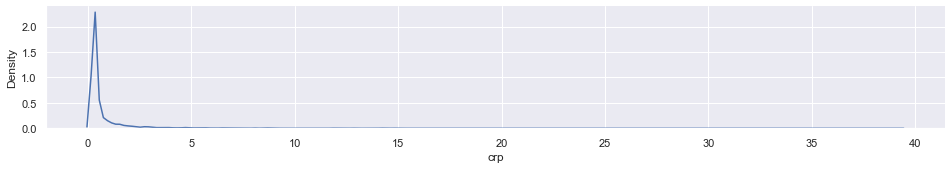

In [13]:
# First, let's have a closer look ar CRP variable, also extremely skewed
g = sns.displot(multim, x = "crp", kind = "kde", bw_adjust = .25)
g.fig.set_size_inches(15,2)

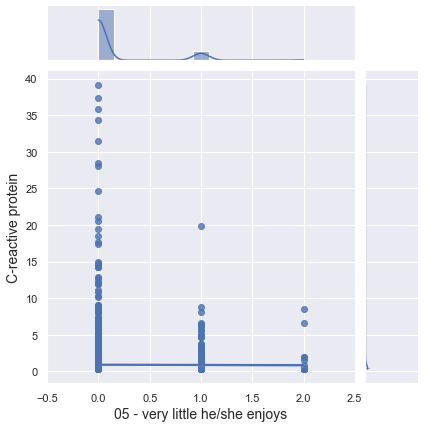

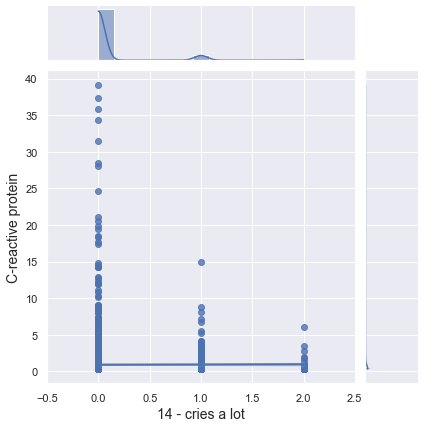

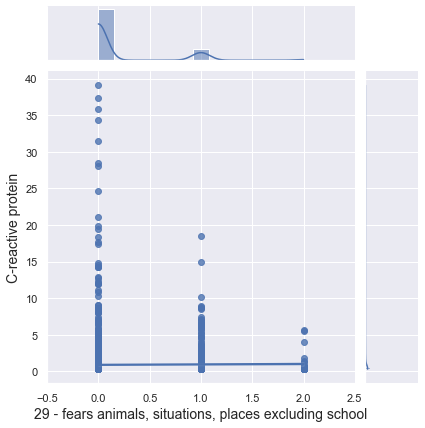

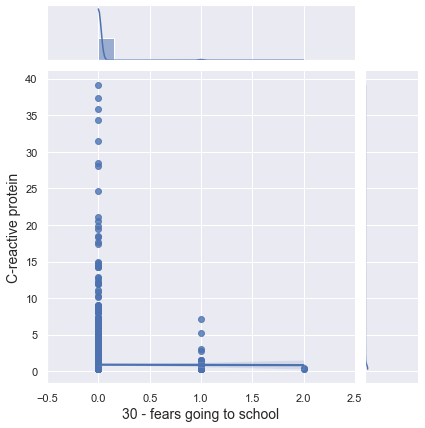

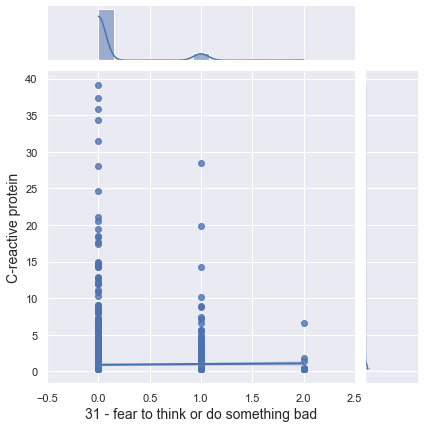

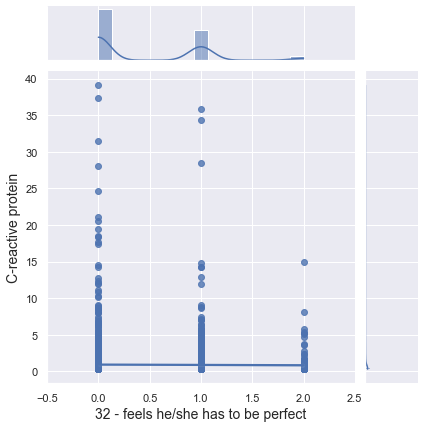

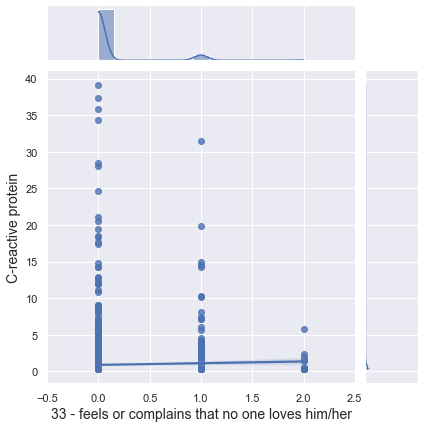

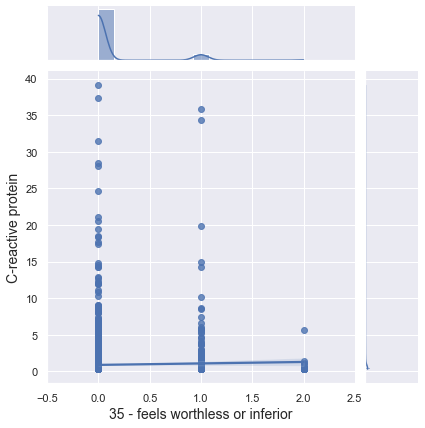

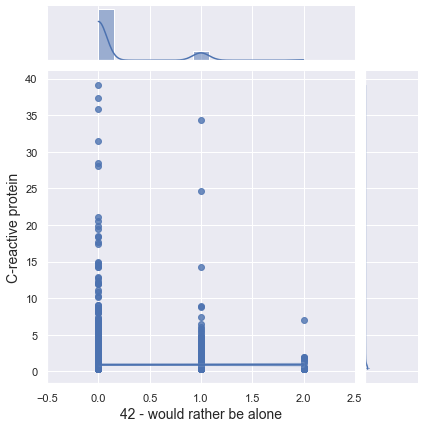

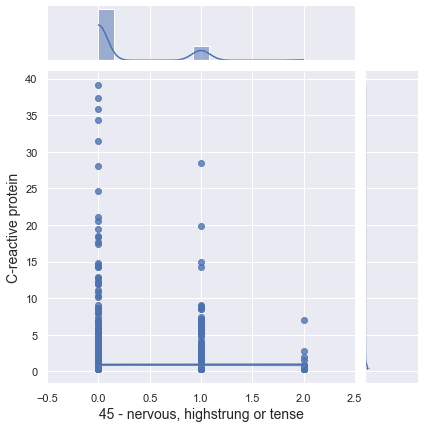

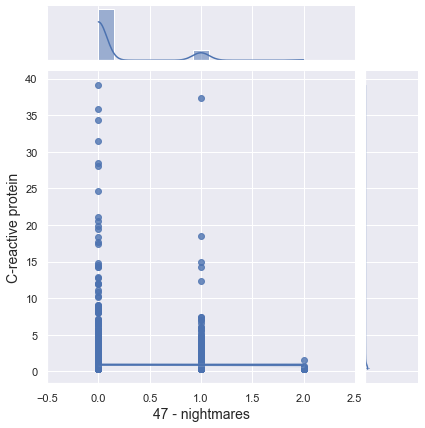

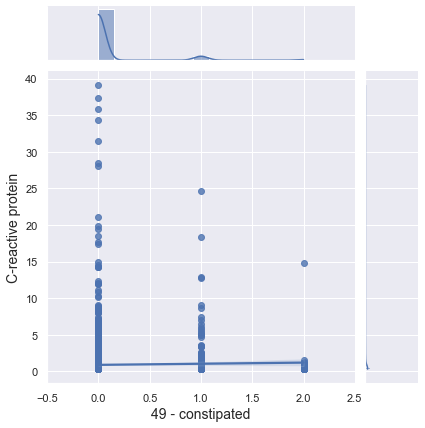

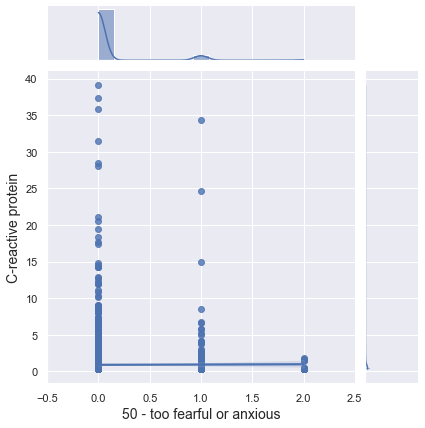

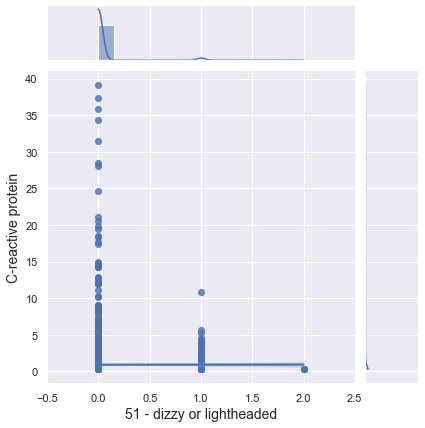

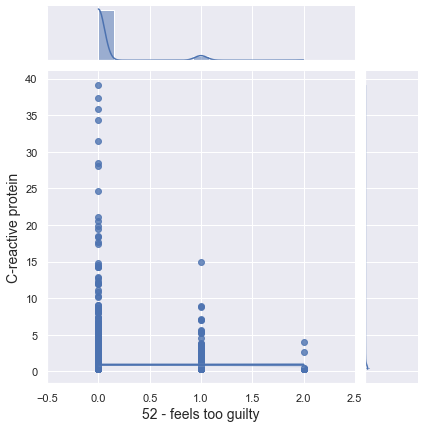

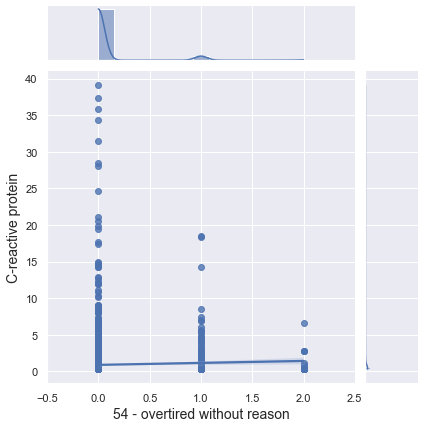

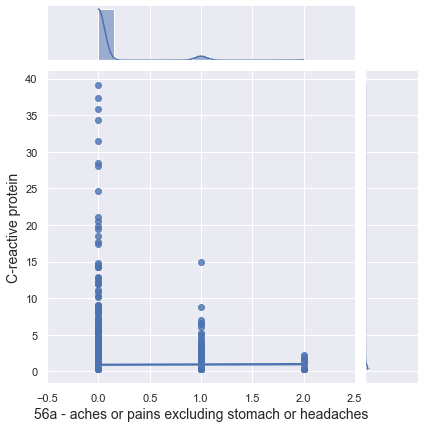

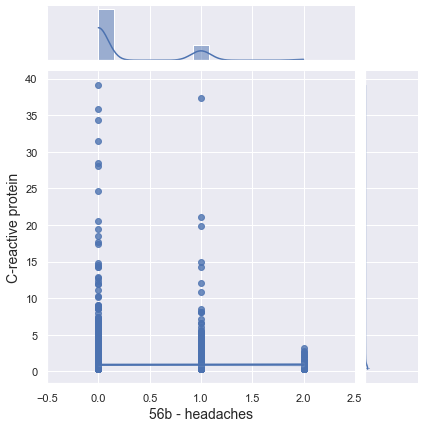

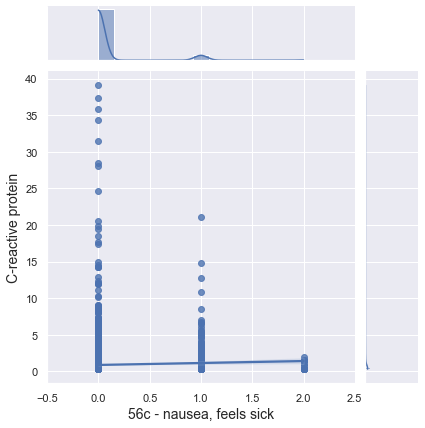

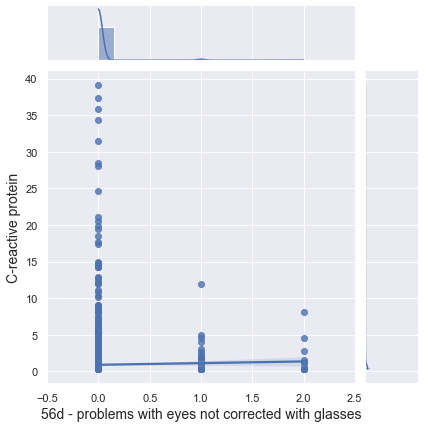

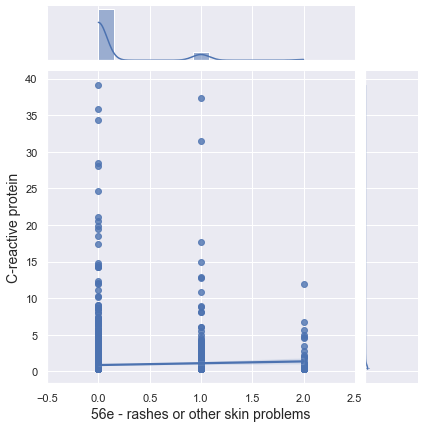

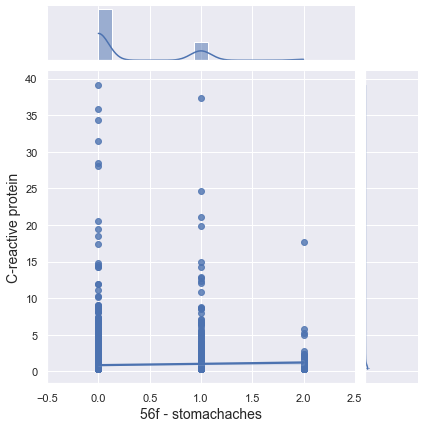

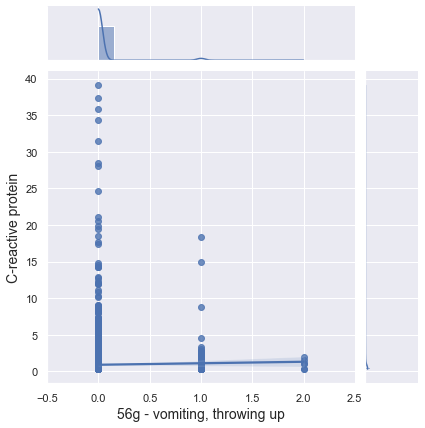

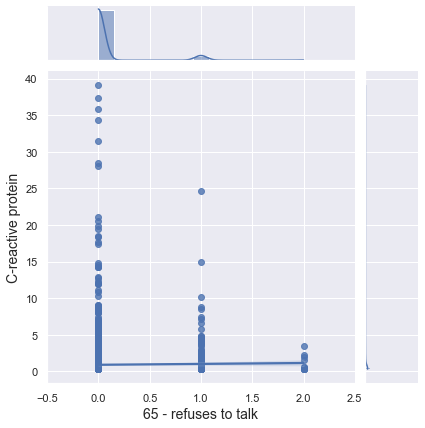

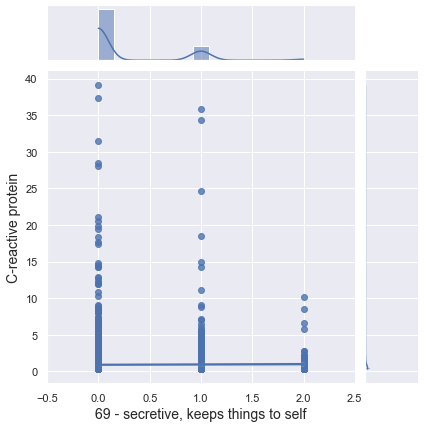

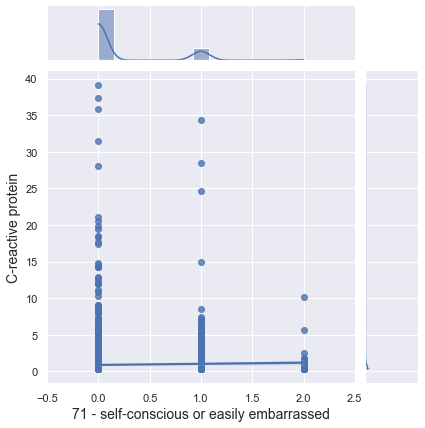

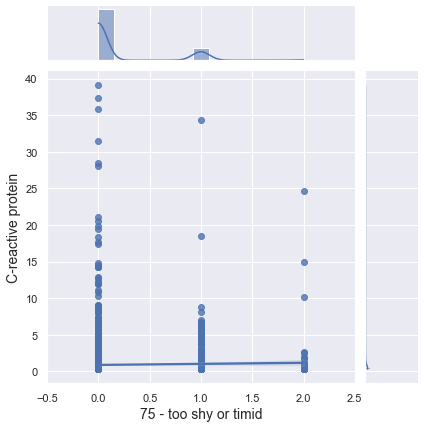

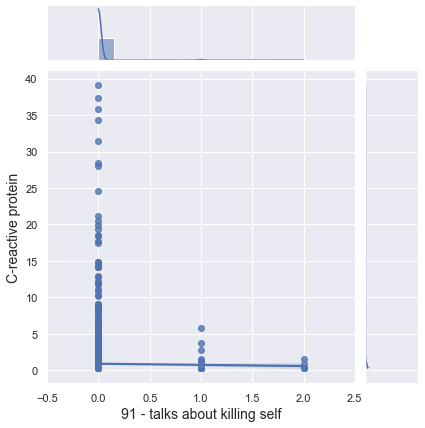

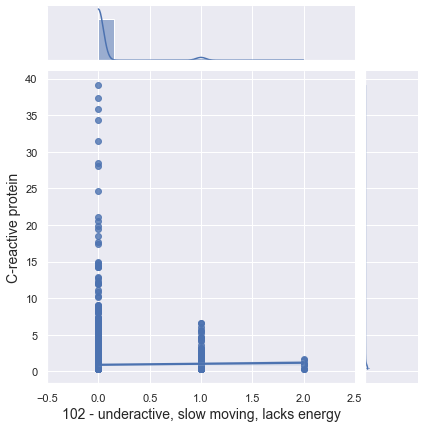

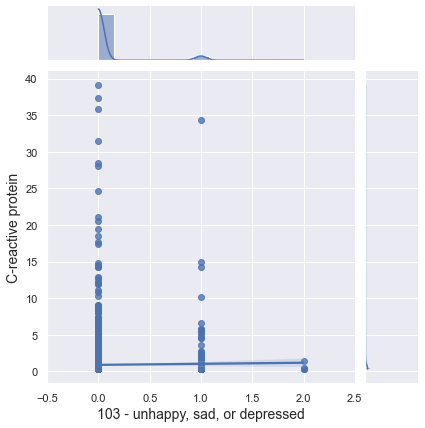

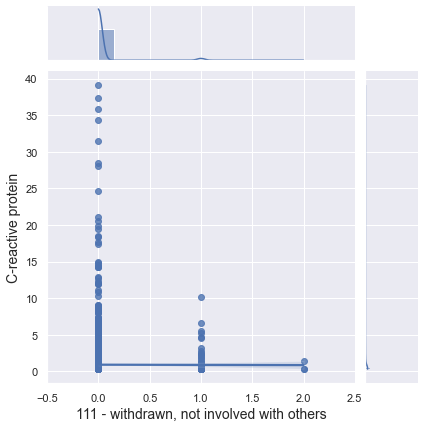

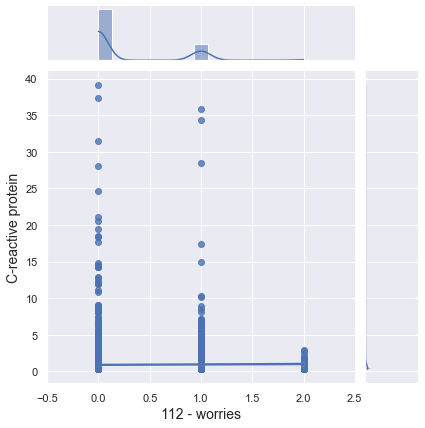

In [14]:
for i in range(32):
    p = sns.jointplot(data = multim, x = multim.columns[i], y = "crp", kind="reg", xlim = (-0.5,2.5))
    p.set_axis_labels(cbcl_items[i],'C-reactive protein', fontsize = 14)